## **09-05 글로브(GloVe)**
---

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 GloVe 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/22885  

이 자료는 2021년 10월 14일에 마지막으로 테스트되었습니다.

**글로브(Global Vectors for Word Representation, GloVe)** 는 카운트 기반과 예측 기반을 모두 사용하는 방법론으로 2014년에 미국 스탠포드대학에서 개발한 단어 임베딩 방법론입니다. 앞서 학습하였던 기존의 **카운트 기반의 LSA(Latent Semantic Analysis)** 와 **예측 기반의 Word2Vec** 의 단점을 지적하며 이를 **보완** 한다는 목적으로 나왔고, 실제로도 Word2Vec만큼 뛰어난 성능을 보여줍니다. 현재까지의 연구에 따르면 단정적으로 Word2Vec와 GloVe 중에서 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직합니다.

---
### **1. 기존 방법론에 대한 비판**

기존의 방법론을 언급해보겠습니다. **LSA** 는 DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론이었습니다. 

반면, **Word2Vec** 는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론이었습니다. 서로 다른 방법을 사용하는 이 두 방법론은 각각 장, 단점이 있습니다.  
  
* **LSA** 는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만, 왕:남자 = 여왕:? (정답은 여자)와 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어집니다. 

* **Word2Vec** 는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못합니다. 

* **GloVe** 는 이러한 기존 방법론들의 각각의 한계를 지적하며, LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용합니다.

---
### **2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)**

단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말합니다. 예제를 보면 어렵지 않습니다. 아래와 같은 3개 문서로 구성된 텍스트 데이터가 있다고 해봅시다.  
  
* I like deep learning
* I like NLP
* I enjoy flying
  
윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 됩니다. 윈도우 크기가 1일 때, 위의 텍스트를 가지고 구성한 동시 등장 행렬은 다음과 같습니다.

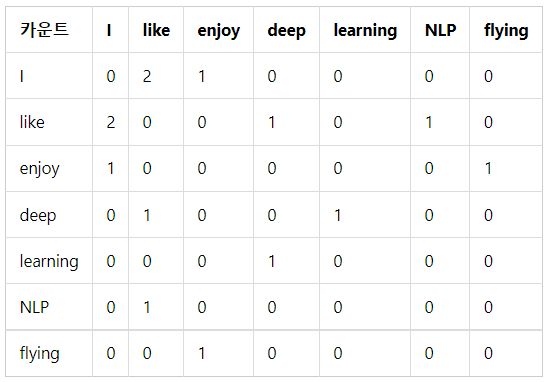

위 행렬은 행렬을 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있습니다. 그 이유는 i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일하기 때문입니다.  
  
위의 테이블은 스탠포드 대학교의 자연어 처리 강의를 참고하였습니다.  
링크 : http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf

---
### **3. 동시 등장 확률(Co-occurrence Probability)**

동시 등장 행렬에 대해서 이해했으니, 동시 등장 확률에 대해서 이해해봅시다. 아래의 표는 어떤 동시 등장 행렬을 가지고 정리한 동시 등장 확률(Co-occurrence Probability)을 보여줍니다. 그렇다면, 동시 등장 확률이란 무엇일까요?

동시 등장 확률 $P(k|i)$는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다.

$P(k|i)$에서 i를 중심 단어(Center Word), k를 주변 단어(Context Word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값이라고 볼 수 있겠습니다. 다음은 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예입니다.

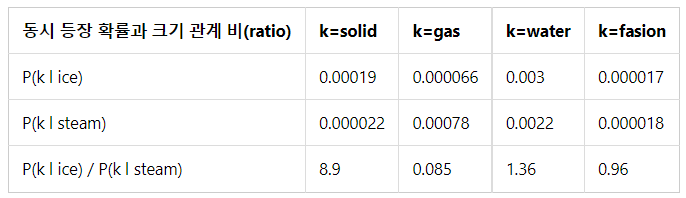

위의 표를 통해 알 수 있는 사실은 ice가 등장했을 때 solid가 등장할 확률 0.00019은 steam이 등장했을 때 solid가 등장할 확률인 0.000022보다 약 8.9배 크다는 겁니다. 그도 그럴 것이 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장할 겁니다.

수식적으로 다시 정리하여 언급하면 k가 solid일 때, P(solid l ice) / P(solid l steam)를 계산한 값은 8.9가 나옵니다. 이 값은 1보다는 매우 큰 값입니다. 왜냐면 P(solid | ice)의 값은 크고, P(solid | steam)의 값은 작기 때문입니다.

그런데 k를 solid가 아니라 gas로 바꾸면 얘기는 완전히 달라집니다. gas는 ice보다는 steam과 더 자주 등장하므로, P(gas l ice) / P(gas l steam)를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나옵니다. 반면, k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나오고, k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값이 나옵니다. 보기 쉽도록 조금 단순화해서 표현한 표는 다음과 같습니다.

동시 등장 확률과 크기 관계 비(ratio)  
  
|   |k=solid | k=gas | k=water | k=fasion |
| ------|------|------|------|---|
|P(k l ice) | 큰 값 | 작은 값 | 큰 값 | 작은 값 |
|P(k l steam) | 작은 값 | 큰 값 | 큰 값 | 작은 값 |
|P(k l ice) / P(k l steam) | 큰 값 | 작은 값 | 1에 가까움 | 1에 가까움 |

동시 등장 행렬과 동시 등장 확률의 이해를 바탕으로 손실 함수를 설계해보겠습니다.

---
### **4. 손실 함수(Loss function)**

우선 손실 함수를 설명하기 전에 각 용어를 정리해보겠습니다.

* $X$ : 동시 등장 행렬(Co-occurrence Matrix)
* ${X_i}_j$ : 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
* $X_i$ : $\sum_j X_{ij}$동시 등장 행렬에서 i행의 값을 모두 더한 값
* $P_{ik}$ : $P(k\ |\ i)$  = $\frac{X_{ik}}{X_{i}}$ : 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률  
Ex) $P(solid\ |\ ice)$ = 단어 ice가 등장했을 때 단어 solid가 등장할 확률

* $\frac{P_{ik}}{P_{jk}}$ : $P_{ik}$를 ${P_{jk}}$로 나눠준 값  
Ex) $P(solid l ice) / P(solid l steam) = 8.9$
* $w_{i}$ : 중심 단어 i의 임베딩 벡터
* ${w_{k}}$: 주변 단어 k의 임베딩 벡터  
  
GloVe의 아이디어를 한 줄로 요약하면 **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'**입니다. 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표입니다. 이를 식으로 표현하면 다음과 같습니다.

$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ P(k\ |\ i) = P_{ik}$

뒤에서 보게되겠지만, 더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계합니다.  


$dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ log\ P(k\ |\ i) = log\ P_{ik}$  
  


  
임베딩 벡터들을 만들기 위한 손실 함수를 처음부터 차근차근 설계해보겠습니다. 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다는 겁니다. 이를 위해 앞서 배운 개념인 $P_{ik} / P_{jk}$를 식에 사용합니다. GloVe의 연구진들은 벡터 $w_{i}, w_{j}, \tilde{w_{k}}$를 가지고 어떤 함수 $F$를 수행하면, $P_{ik} / P_{jk}$가 나온다는 초기 식으로부터 전개를 시작합니다.

$$F(w_{i},\ w_{j},\ \tilde{w_{k}}) =\frac{P_{ik}}{P_{jk}}$$

아직 이 함수 $F$가 어떤 식을 가지고 있는지는 정해진 게 없습니다. 위의 목적에 맞게 근사할 수 있는 함수식은 무수히 많겠으나 최적의 식에 다가가기 위해서 차근, 차근 디테일을 추가해보겠습니다. 함수 $F$는 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적입니다. 이를 위해 GloVe 연구진들은 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 사용하는 것을 제안합니다.

$$F(w_{i} -\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

그런데 우변은 스칼라값이고 좌변은 벡터값입니다. 이를 성립하기 해주기 위해서 함수 $F$의 두 입력에 내적(Dot product)을 수행합니다

$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$

정리하면, 선형 공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택했습니다.  
  
여기서 함수 $F$가 만족해야 할 필수 조건이 있습니다. 중심 단어 $w$와 주변 단어 $\tilde{w}$라는 선택 기준은 실제로는 무작위 선택이므로 이 둘의 관계는 자유롭게 교환될 수 있도록 해야합니다. 이것이 성립되게 $F$하기 위해서 GloVe 연구진은 함수 가 실수의 덥셈과 양수의 곱셈에 대해서 **준동형(Homomorphism)**을 만족하도록 합니다. 생소한 용어라서 말이 어려워보이는데, 정리하면 $a$와 $b$에 대해서 함수 $F$가 $F(a + b)$가 $F(a)F(b)$와 같도록 만족시켜야 한다는 의미입니다.

식으로 나타내면 아래와 같습니다.

$F(a+b) = F(a)F(b),\ \forall a,\ b\in \mathbb{R}$

이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 조금씩 바꿔볼 겁니다. 전개하던 GloVe 식에 따르면, 함수 $F$는 결과값으로 스칼라 값($\frac{P_{ik}}{P_{jk}}$)이 나와야 합니다. 준동형식에서 $a$와 $b$가 각각 벡터값이라면 함수 $F$의 결과값으로는 스칼라 값이 나올 수 없지만, $a$와 $b$가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있습니다. 그러므로 위의 준동형식을 아래와 같이 바꿔보겠습니다. 여기서 $v_{1},\ v_{2},\ v_{3},\ v_{4}$는 각각 벡터값입니다. 아래의 $V$는 벡터를 의미합니다.

$F(v_{1}^{T}v_{2} + v_{3}^{T}v_{4}) = F(v_{1}^{T}v_{2})F(v_{3}^{T}v_{4}),\ \forall v_{1},\ v_{2},\ v_{3},\ v_{4}\in V$

그런데 앞서 작성한 GloVe 식에서는 $w_i$와 $w_j$라는 두 벡터의 차이를 함수 $F$의 입력으로 받았습니다. GloVe 식에 바로 적용을 위해 준동형 식을 이를 뺄셈에 대한 준동형식으로 변경합니다. 그렇게 되면 곱셈도 나눗셈으로 바뀝니다.

$$F(v_{1}^{T}v_{2} - v_{3}^{T}v_{4}) = \frac{F(v_{1}^{T}v_{2})}{F(v_{3}^{T}v_{4})},\ \forall v_{1},\ v_{2},\ v_{3},\ v_{4}\in V$$

이 준동형 식을 GloVe 식에 적용해보겠습니다. 우선, 함수 $F$의 우변은 다음과 같이 바뀌어야 합니다.

$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

그런데 이전의 식에 따르면 우변은 본래 $\frac{P_{ik}}{P_{jk}}$
였으므로, 결과적으로 다음과 같습니다.

$$\frac{P_{ik}}{P_{jk}} = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$

$$F(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

좌변을 풀어쓰면 다음과 같습니다.

$$F(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$


이는 뺄셈에 대한 준동형식의 형태와 정확히 일치합니다. 이를 만족하는 함수 $F$를 찾아야 할 때입니다. 그리고 이를 정확하게 만족시키는 함수가 있는데 바로 지수 함수(Exponential function)입니다. $F$를 지수 함수 $exp$라고 해봅시다.

$$exp(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{exp(w_{i}^{T}\tilde{w_{k}})}{exp(w_{j}^{T}\tilde{w_{k}})}$$

$$exp(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$

위의 두번째 식으로부터 다음과 같은 식을 얻을 수 있습니다.


$$w_{i}^{T}\tilde{w_{k}} = log\ P_{ik} = log\ (\frac{X_{ik}}{X_{i}}) = log\ X_{ik} - log\ X_{i}$$

그런데 여기서 상기해야할 것은 앞서 언급했듯이, 사실 $w_{i}$와 $\tilde{w_{k}}$
는 두 값의 위치를 서로 바꾸어도 식이 성립해야 합니다. $X_{ik}$의 정의를 생각해보면 $X_{ki}$와도 같습니다. 그런데 이게 성립되려면 위의 식에서 $log\ X_{i}$항이 걸림돌입니다. 이 부분만 없다면 이를 성립시킬 수 있습니다. 그래서 GloVe 연구팀은 이 $log\ X_{i}$항을 $w_i$에 대한 편향 $b_i$라는 상수항으로 대체하기로 합니다. 같은 이유로 $\tilde{w_{k}}$에 대한 편향 $\tilde{b_{k}}$를 추가합니다.

$$w_{i}^{T}\tilde{w_{k}} + b_{i} + \tilde{b_{k}} = log\ X_{ik}$$

이 식이 손실 함수의 핵심이 되는 식입니다. 우변의 값과의 차이를 최소화는 방향으로 좌변의 4개의 항은 학습을 통해 값이 바뀌는 변수들이 됩니다. 즉, 손실 함수는 다음과 같이 일반화될 수 있습니다.

$$Loss\ function = \sum_{m, n=1}^{V}\ (w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

여기서 $V$는 단어 집합의 크기를 의미합니다. 그런데 아직 최적의 손실 함수라기에는 부족합니다. GloVe 연구진은 $log\ X_{ik}$에서 $X_{ik}$값이 0이 될 수 있음을 지적합니다. 대안 중 하나는 $log\ X_{ik}$항을 $log\ (1 + X_{ik})$로 변경하는 것입니다. 하지만 이렇게 해도 여전히 해결되지 않는 문제가 있습니다.  
  
바로 동시 등장 행렬 $X$는 마치 DTM처럼 희소 행렬(Sparse Matrix)일 가능성이 다분하다는 점입니다. 동시 등장 행렬 $X$에는 많은 값이 0이거나, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지는 경우가 많습니다. 앞서 빈도수를 가지고 가중치를 주는 고민을 하는 TF-IDF나 LSA와 같은 몇 가지 방법들을 본 적이 있습니다. GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 $X_{ik}$이 굉장히 낮은 경우에는 정보에 거의 도움이 되지 않는다고 판단합니다. 그래서 이에 대한 가중치를 주는 고민을 하게 되는데 GloVe 연구팀이 선택한 것은 바로 $X_{ik}$의 값에 영향을 받는 가중치 함수(Weighting function) $f(X_{ik})$를 손실 함수에 도입하는 것입니다.

GloVe에 도입되는 $f(X_{ik})$의 그래프를 보겠습니다.

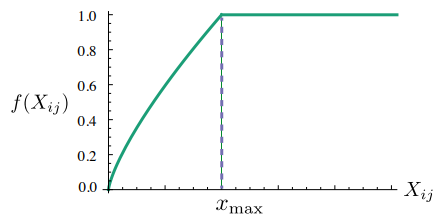

$X_{ik}$의 값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 합니다. 하지만 $X_{ik}$가 지나치게 높다고해서 지나친 가중치를 주지 않기위해서 또한 함수의 최대값이 정해져 있습니다. (최대값은 1) 예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고해서 지나친 가중을 받아서는 안 됩니다. 이 함수의 값을 손실 함수에 곱해주면 가중치의 역할을 할 수 있습니다.

이 함수 $f(x)$의 식은 다음과 같이 정의됩니다.  
  
$f(x) = min(1,\ (x/x_{max})^{3/4})$

최종적으로 다음과 같은 일반화 된 손실 함수를 얻어낼 수 있습니다.

$$Loss\ function = \sum_{m, n=1}^{V}\ f(X_{mn})(w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

---
### **5. GloVe 훈련시키기**

실습을 위해 프롬프트에서 아래 커맨드로 GloVe 패키지를 설치합니다.

In [9]:
!pip install glove-python3  # glove-python3 설치 (Python 3.10 이후에서!)
# !pip install glove_python_binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065518 sha256=223a7a2b96142dfa8206905be4a8edb4adba526f7b65ce45b7eaa47ec1234965
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [12]:
pip list | grep glove

glove_python3                    0.1.0


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [15]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7c707d08a740>)

In [16]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [17]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


GloVe의 입력이 되는 훈련 데이터는 **'영어와 한국어 Word2Vec 학습하기'** 챕터에서 사용한 영어 데이터를 재사용합니다. 모든 동일한 전처리를 마치고 이전과 동일하게 result에 결과가 저장되어있다고 가정합니다.

In [18]:
from glove import Corpus, Glove

corpus = Corpus()

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


학습이 완료되었습니다. glove.most_similar()는 입력 단어의 가장 유사한 단어들의 리스트를 리턴합니다.

In [19]:
print(glove.most_similar("man"))

[('woman', 0.9611941532771029), ('guy', 0.88287231401366), ('girl', 0.87387028321642), ('boy', 0.8514179508065023)]


In [20]:
print(glove.most_similar("boy"))

[('girl', 0.9370991611657205), ('woman', 0.8804048060269537), ('man', 0.8514179508065023), ('kid', 0.8259541247564741)]


In [21]:
print(glove.most_similar("university"))

[('harvard', 0.8920834814469898), ('mit', 0.8614435059869833), ('cambridge', 0.83292223114807), ('stanford', 0.8326630804768025)]


In [22]:
print(glove.most_similar("water"))

[('air', 0.8331610538911862), ('clean', 0.8330921473021611), ('fresh', 0.8238064160135927), ('food', 0.8185963978326477)]


In [23]:
print(glove.most_similar("physics"))

[('chemistry', 0.8875288013587056), ('mathematics', 0.8724458608110451), ('economics', 0.8683950558083176), ('beauty', 0.8668663840398715)]


In [24]:
print(glove.most_similar("muscle"))

[('tissue', 0.8393468142407793), ('nerve', 0.8263508148270816), ('stem', 0.7703527054674413), ('channel', 0.7693706609586238)]


In [25]:
print(glove.most_similar("clean"))

[('fresh', 0.8506711978973925), ('water', 0.833092147302161), ('heat', 0.8189374706317414), ('air', 0.7967367438162617)]


사전 훈련된 GloVe를 사용하는 방법은 다음 챕터에서 다룹니다.

---
참고 자료  
https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010  
  
마지막 편집일시 : 2022년 12월 2일 10:30 오전